<a href="https://colab.research.google.com/github/varshithreddy07/Explainable-Ai-Lab/blob/main/EXP_Ai_lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


/tmp/ipython-input-682104612.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.72      0.83      1458
           1       0.13      0.77      0.22        75

    accuracy                           0.73      1533
   macro avg       0.55      0.75      0.53      1533
weighted avg       0.94      0.73      0.80      1533



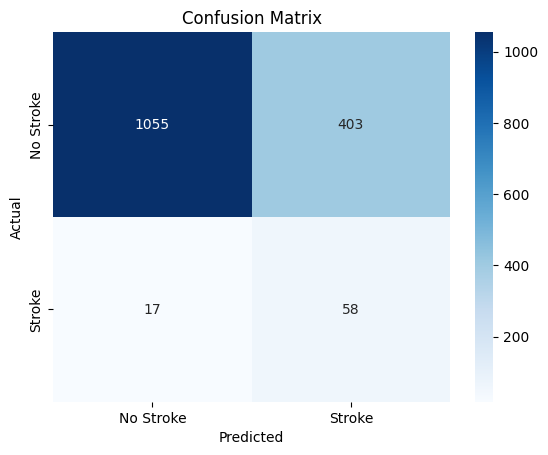

/tmp/ipython-input-682104612.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette="viridis")


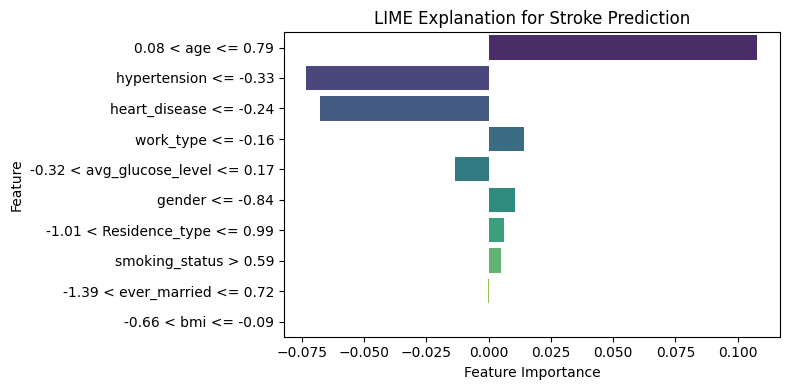

/tmp/ipython-input-682104612.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef, y=df.drop("stroke", axis=1).columns.tolist(), palette="mako")


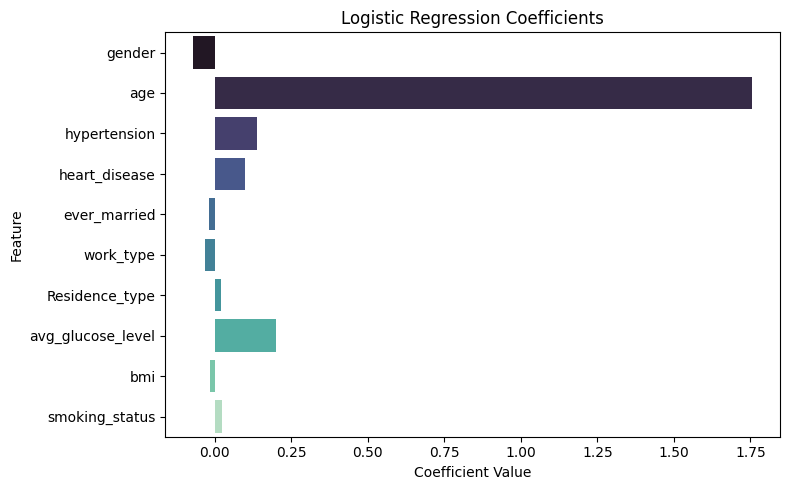

In [1]:
!pip install lime --quiet

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from lime.lime_tabular import LimeTabularExplainer

# Load dataset
df = pd.read_csv("stroke-data.csv")

# Preprocess data
df = df.drop('id', axis=1)
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')
df['bmi'].fillna(df['bmi'].median(), inplace=True)

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X = df.drop('stroke', axis=1)
y = df['stroke']

# Split first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale after split
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model with class balancing
model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Stroke','Stroke'], yticklabels=['No Stroke','Stroke'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# LIME explanation
explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=df.drop("stroke", axis=1).columns.tolist(),
    class_names=['No Stroke', 'Stroke'],
    mode='classification'
)

# Pick a test sample with actual Stroke if available
stroke_indices = np.where(y_test.values == 1)[0]
i = stroke_indices[0] if len(stroke_indices) > 0 else 0

exp = explainer.explain_instance(X_test[i], model.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True, show_all=False)

# Visualize LIME results
lime_results = exp.as_list()
feature_names = [x[0] for x in lime_results]
feature_importances = [x[1] for x in lime_results]

plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importances, y=feature_names, palette="viridis")
plt.title('LIME Explanation for Stroke Prediction')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Visualize model coefficients
coef = model.coef_.flatten()
plt.figure(figsize=(8, 5))
sns.barplot(x=coef, y=df.drop("stroke", axis=1).columns.tolist(), palette="mako")
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Dataset Shape: (195, 24)
Columns: Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374

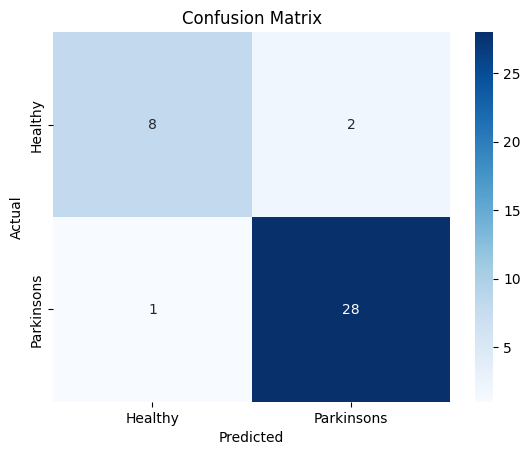


✅ LIME explanation saved to lime_parkinsons.html


/tmp/ipython-input-2403663843.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette="viridis")


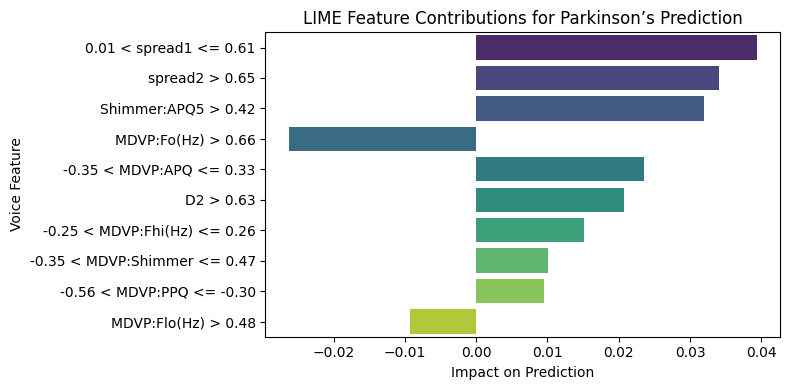

/tmp/ipython-input-2403663843.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances[:15], y=feat_importances.index[:15], palette="mako")


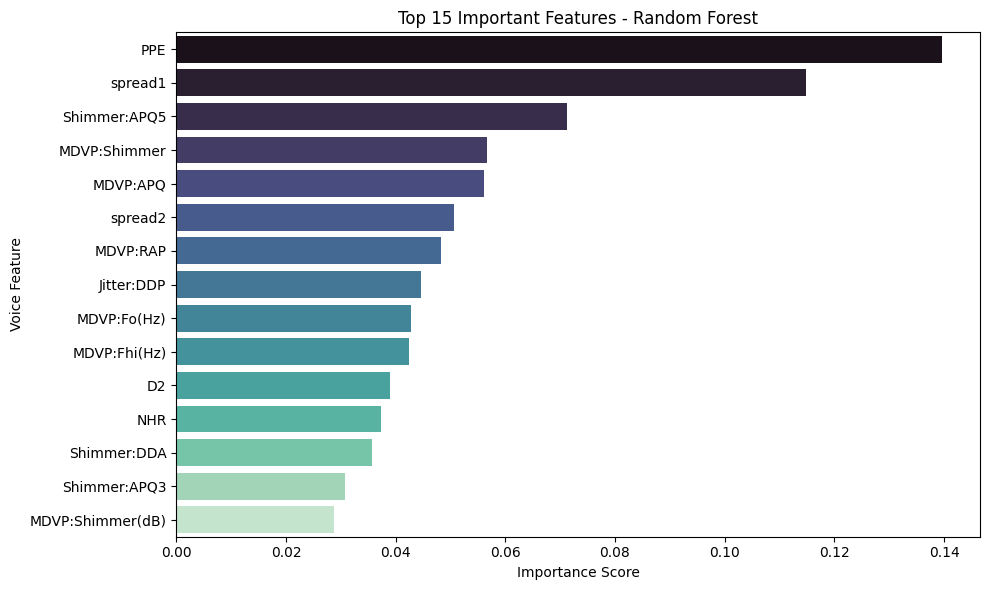

In [2]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import lime
from lime.lime_tabular import LimeTabularExplainer


# 2. Load Dataset
# Replace 'parkinsons.csv' with your dataset file name
df = pd.read_csv("parkinsons.csv")

print("Dataset Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())


# 3. Features & Target
# Usually 'status' column is target (1 = Parkinson’s, 0 = Healthy)
X = df.drop(['status', 'name'], axis=1, errors='ignore')  # drop name if present
y = df['status']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 4. Train Random Forest
model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Parkinsons'],
            yticklabels=['Healthy', 'Parkinsons'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 5. LIME Explanations
explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=X.columns.tolist(),
    class_names=['Healthy', 'Parkinsons'],
    mode='classification'
)

# Pick a patient sample to explain
i = 5
exp = explainer.explain_instance(X_test[i], model.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)

# Save explanation
exp.save_to_file("lime_parkinsons.html")
print("\n✅ LIME explanation saved to lime_parkinsons.html")

# Plot feature contributions from LIME
lime_results = exp.as_list()
feature_names = [x[0] for x in lime_results]
feature_importances = [x[1] for x in lime_results]

plt.figure(figsize=(8,4))
sns.barplot(x=feature_importances, y=feature_names, palette="viridis")
plt.title("LIME Feature Contributions for Parkinson’s Prediction")
plt.xlabel("Impact on Prediction")
plt.ylabel("Voice Feature")
plt.tight_layout()
plt.show()


# 6. Feature Importances (Random Forest global view)
feat_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances[:15], y=feat_importances.index[:15], palette="mako")
plt.title("Top 15 Important Features - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Voice Feature")
plt.tight_layout()
plt.show()
